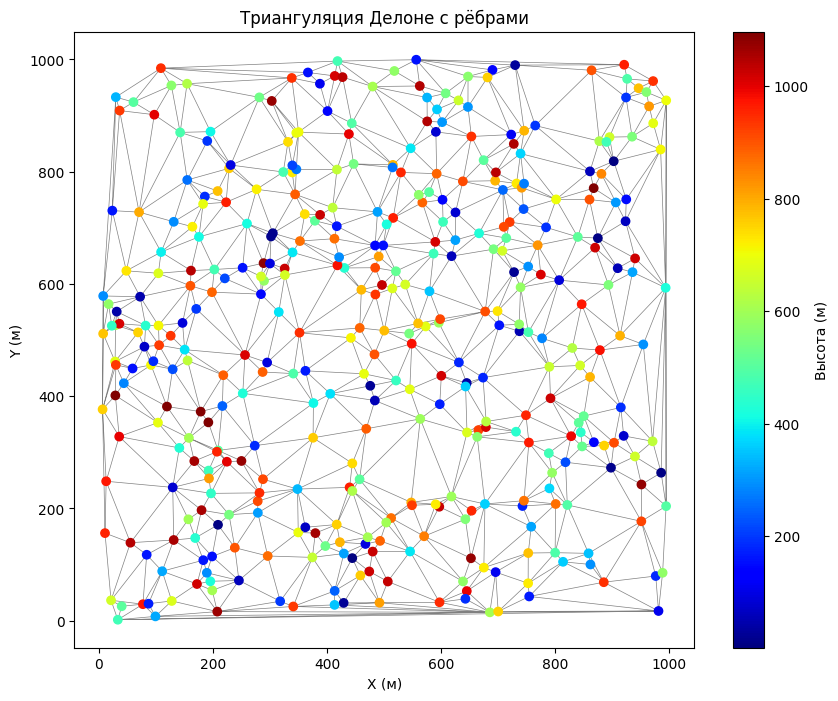

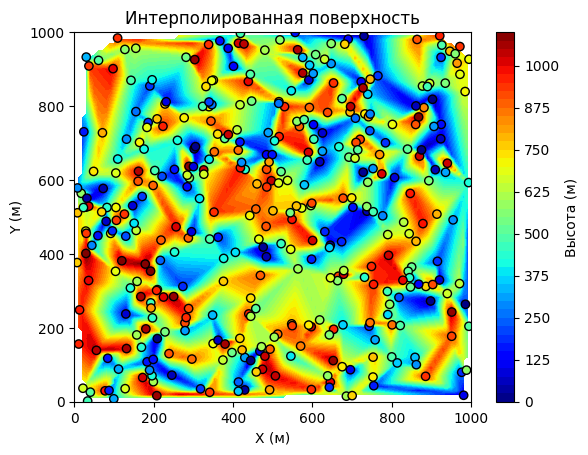

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

N = 11
num_points = 400
square_size = 1000
height_range = (0, 100 * N)

x = np.random.uniform(0, square_size, num_points)
y = np.random.uniform(0, square_size, num_points)
z = np.random.uniform(height_range[0], height_range[1], num_points)
points = np.column_stack((x, y))

def bowyer_watson(points):
    def in_circumcircle(triangle, p):
        ax, ay = triangle[0]
        bx, by = triangle[1]
        cx, cy = triangle[2]
        det = (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by))
        if det == 0:
            return False
        d = 1 / (2 * det)
        ux = (ax * ax + ay * ay) * (by - cy) + (bx * bx + by * by) * (cy - ay) + (cx * cx + cy * cy) * (ay - by)
        uy = (ax * ax + ay * ay) * (cx - bx) + (bx * bx + by * by) * (ax - cx) + (cx * cx + cy * cy) * (bx - ax)
        return (ux * d, uy * d)

    def remove_bad_triangles(triangles, p):
        bad_triangles = []
        for triangle in triangles:
            if in_circumcircle(triangle, p):
                bad_triangles.append(triangle)
        return bad_triangles

    def add_triangle(triangles, p, bad_triangles):
        new_triangles = []
        for triangle in bad_triangles:
            new_triangles.append([triangle[0], triangle[1], p])
            new_triangles.append([triangle[1], triangle[2], p])
            new_triangles.append([triangle[2], triangle[0], p])
        return new_triangles

    triangles = []
    for i in range(len(points)):
        p = points[i]
        bad_triangles = remove_bad_triangles(triangles, p)
        triangles = add_triangle(triangles, p, bad_triangles)
    
    return triangles

triangles = bowyer_watson(points)

triangle_indices = []
for triangle in triangles:
    indices = [np.where(np.all(points == pt, axis=1))[0][0] for pt in triangle]
    triangle_indices.append(indices)

plt.figure(figsize=(10, 8))
plt.triplot(x, y, triangle_indices, color='gray', lw=0.5)
plt.scatter(x, y, c=z, cmap='jet', marker='o')
plt.colorbar(label='Высота (м)')
plt.xlabel('X (м)')
plt.ylabel('Y (м)')
plt.title('Триангуляция Делоне с рёбрами')
plt.show()

interp_func = scipy.interpolate.LinearNDInterpolator(points, z)

# num_test_points = 10
# test_x = np.random.uniform(0, square_size, num_test_points)
# test_y = np.random.uniform(0, square_size, num_test_points)
# test_points = np.column_stack((test_x, test_y))
# estimated_heights = interp_func(test_points)

# real_heights = np.random.uniform(height_range[0], height_range[1], num_test_points)
# relative_errors = np.abs((estimated_heights - real_heights) / real_heights) * 100
# mean_error = np.nanmean(relative_errors)

# print("Средняя относительная погрешность интерполяции:", mean_error, "%")

grid_x, grid_y = np.meshgrid(np.linspace(0, square_size, 100), np.linspace(0, square_size, 100))
grid_z = interp_func(grid_x, grid_y)

plt.contourf(grid_x, grid_y, grid_z, cmap='jet', levels=50)
plt.colorbar(label='Высота (м)')
plt.scatter(x, y, c=z, cmap='jet', edgecolors='k', marker='o')
plt.xlabel('X (м)')
plt.ylabel('Y (м)')
plt.title('Интерполированная поверхность')
plt.show()